#**Problem Statement** #

<H1> Business Context </h1>

Customer segmentation plays an important role in the retail industry by dividing a diverse customer base into smaller, more homogenous groups based on common attributes such as demographics, purchasing behavior, preferences, and more. Based on the information gained from this, retailers can identify customer behavioral patterns and tailor their offerings and marketing efforts to cater to the needs of each segment. This helps retailers improve targeted marketing and optimize inventory management, and consequently increasing sales and customer satisfaction.

<H1> Objective </h1>

In the advent of an expanding customer base, a prominent retail outlet wants to enhance its marketing and service strategies. With rising competition, they understand the importance of getting a better understanding of their customer base to identify customer behavior and needs. This will allow them to move away from broad marketing campaigns and general service approaches to targeted marketing campaigns and customized offerings

To address this, the retailer seeks to implement a more sophisticated ML-based customer segmentation strategy and improve overall customer experience. As a data scientist hired to execute the same, you have been provided historical data on customer demographics and spending patterns. The task is to analyze the data, use ML to segment the customers into distinct groups, and identify the characteristics of each group to help increase marketing efficiency and effectiveness, identify and develop retention strategies for high-value customers, and help the management make informed business strategies on store layouts and pricing.




## Data Dictionary ##



1.   <b>Income:</b> The annual household income of the customer (in dollars)
2.   <b>Age:</b> The age of the customer (in years)
3.   <b>Recency:</b> The total number of days since the customer's last purchase
4.   <b>Amount_Wines:</b> The amount of money spent by the customer on wines in the previous two years (in dollars)
5.   <b>Amount_Fruits:</b> The amount of money spent by the customer on fruits in the last two years (in dollars)
6.   <b>Amount_SweetProducts:</b> The amount of money spent by the customer on sweet products in the last two years (in dollars)
7.   <b>Amount_Meat_Fish:</b> The amount of money spent by the customer on meat and fish in the last two years (in dollars)
8.   <b>Web_Purchases:</b> The total number of purchases the customer made through the company’s website.
9.   <b>Store_Purchases:</b> The total number of purchases the customer made directly in stores.

# Import Libraries #

In [1]:
# Libraries required for reading and data manipulation.
import pandas as pd
import numpy as np

# Libraries required for visulization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries required for scaling numerical features
from sklearn.preprocessing import StandardScaler

# Libraries required for Dimensionality reduction
from sklearn.manifold import TSNE

# Libraries required for K-Means clustering.
from sklearn.cluster import KMeans

# Libraries required for model evaluation.
from sklearn.metrics import silhouette_score

# To define a common seed value to be used through out
RS=0

# To filter warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Load Data

In [ ]:
retail_data = pd.read_csv('/content/drive/MyDrive/PGP-AIML/M2 : Machine Learning/Week3/retail_customer_segmentation.csv')
df = retail_data.copy()


# Data Overview #

In [ ]:
# View top 5 records.
df.head()

Income  Age  Recency  Amount_Wines  Amount_Fruits  Amount_SweetProducts  \
0  58138.0   53       58           635             88                    88   
1  46344.0   56       38            11              1                     1   
2  71613.0   45       26           426             49                    21   
3  26646.0   26       26            11              4                     3   
4  58293.0   29       94           173             43                    27   

   Amount_Meat_Fish  Web_Purchases  Store_Purchases  
0               718              8                4  
1                 8              1                2  
2               238              8               10  
3                30              2                4  
4               164              5                6

In [ ]:
# Shape of the data
df.shape

(1600, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1600 non-null   float64
 1   Age                   1600 non-null   int64  
 2   Recency               1600 non-null   int64  
 3   Amount_Wines          1600 non-null   int64  
 4   Amount_Fruits         1600 non-null   int64  
 5   Amount_SweetProducts  1600 non-null   int64  
 6   Amount_Meat_Fish      1600 non-null   int64  
 7   Web_Purchases         1600 non-null   int64  
 8   Store_Purchases       1600 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 112.6 KB


* There are 9 numerical and 0 categorical features in the data.

In [ ]:
# Check the statistical summary of the data.
df.describe().T

count          mean           std     min      25%  \
Income                1600.0  49040.192187  17982.928797  2447.0  35371.5   
Age                   1600.0     41.596875     11.086362    21.0     33.0   
Recency               1600.0     52.701875     27.056710     6.0     29.0   
Amount_Wines          1600.0    278.280625    311.838641     0.0     24.0   
Amount_Fruits         1600.0     23.013125     35.793889     0.0      2.0   
Amount_SweetProducts  1600.0     23.376875     37.253453     0.0      1.0   
Amount_Meat_Fish      1600.0    166.484375    215.702360     6.0     22.0   
Web_Purchases         1600.0      4.159375      2.733568     0.0      2.0   
Store_Purchases       1600.0      5.706875      3.139405     0.0      3.0   

                          50%       75%      max  
Income                50008.0  64033.00  79946.0  
Age                      40.0     51.00     70.0  
Recency                  52.0     76.00     99.0  
Amount_Wines            161.0    452.25   1462.0  
Amount_Fruits             7.0     28.00    199.0  
Amount_SweetProducts      7.0     27.00    263.0  
Amount_Meat_Fish         71.0    227.25   1726.0  
Web_Purchases             4.0      6.00     27.0  
Store_Purchases           5.0      8.00     13.0

* On average, the annual household income of the customers is ~50K.
* The Age of customers range from 21 to 70 years


In [ ]:
# Check for missing values
df.isna().sum()

Income                  0
Age                     0
Recency                 0
Amount_Wines            0
Amount_Fruits           0
Amount_SweetProducts    0
Amount_Meat_Fish        0
Web_Purchases           0
Store_Purchases         0
dtype: int64

* There are no missing values in the data.

In [ ]:
# Check for duplicate data
df.duplicated().sum()

np.int64(0)

* There are no duplicate records in the data.

# **Exploratory Data Analysis** #

## Univariate Analysis ##

In [ ]:
# Numeric features

numeric_features = df.select_dtypes(include="number").columns.to_list()
numeric_features


['Income',
 'Age',
 'Recency',
 'Amount_Wines',
 'Amount_Fruits',
 'Amount_SweetProducts',
 'Amount_Meat_Fish',
 'Web_Purchases',
 'Store_Purchases']

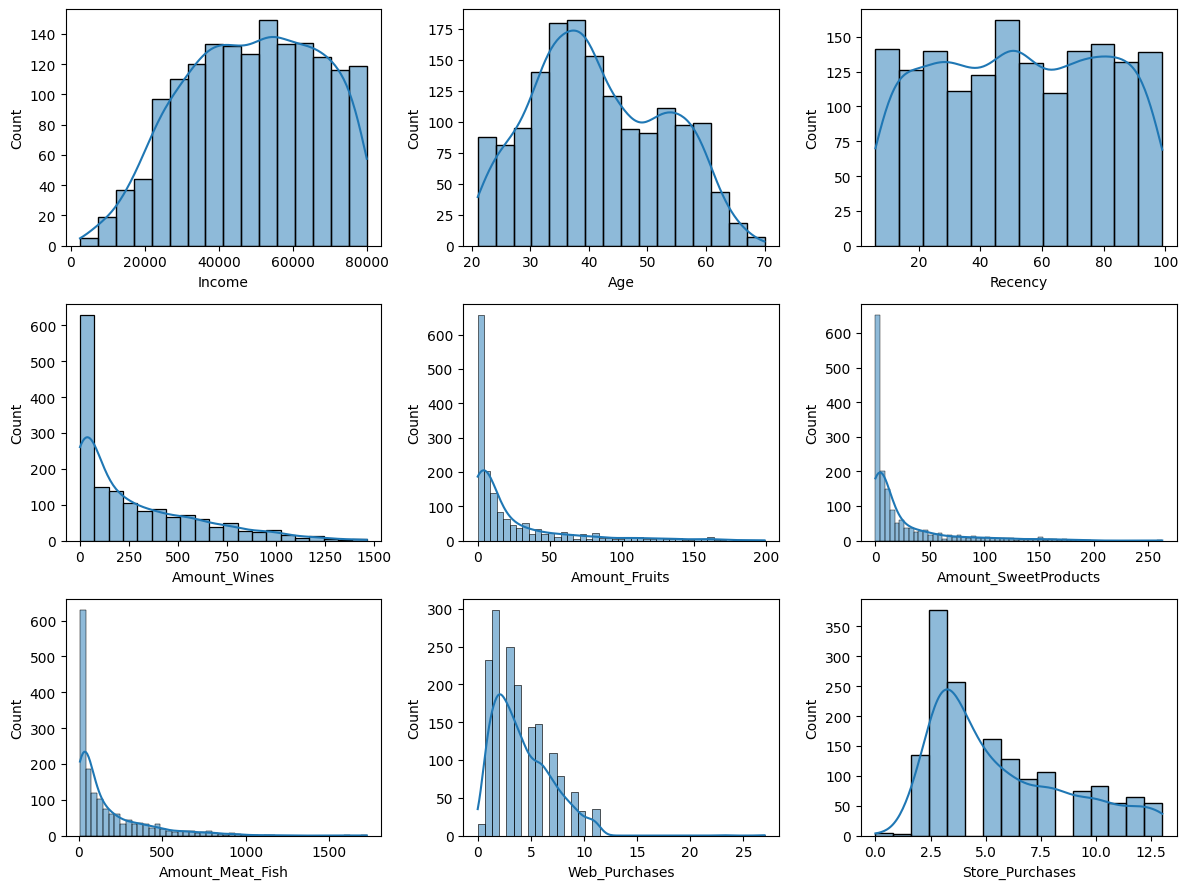

In [ ]:
# Plot histograms for numerical features to review data distribution.

plt.figure(figsize=(12,9))

for i, feature in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  sns.histplot(data=df, x=feature, kde=True)

plt.tight_layout()
plt.show()


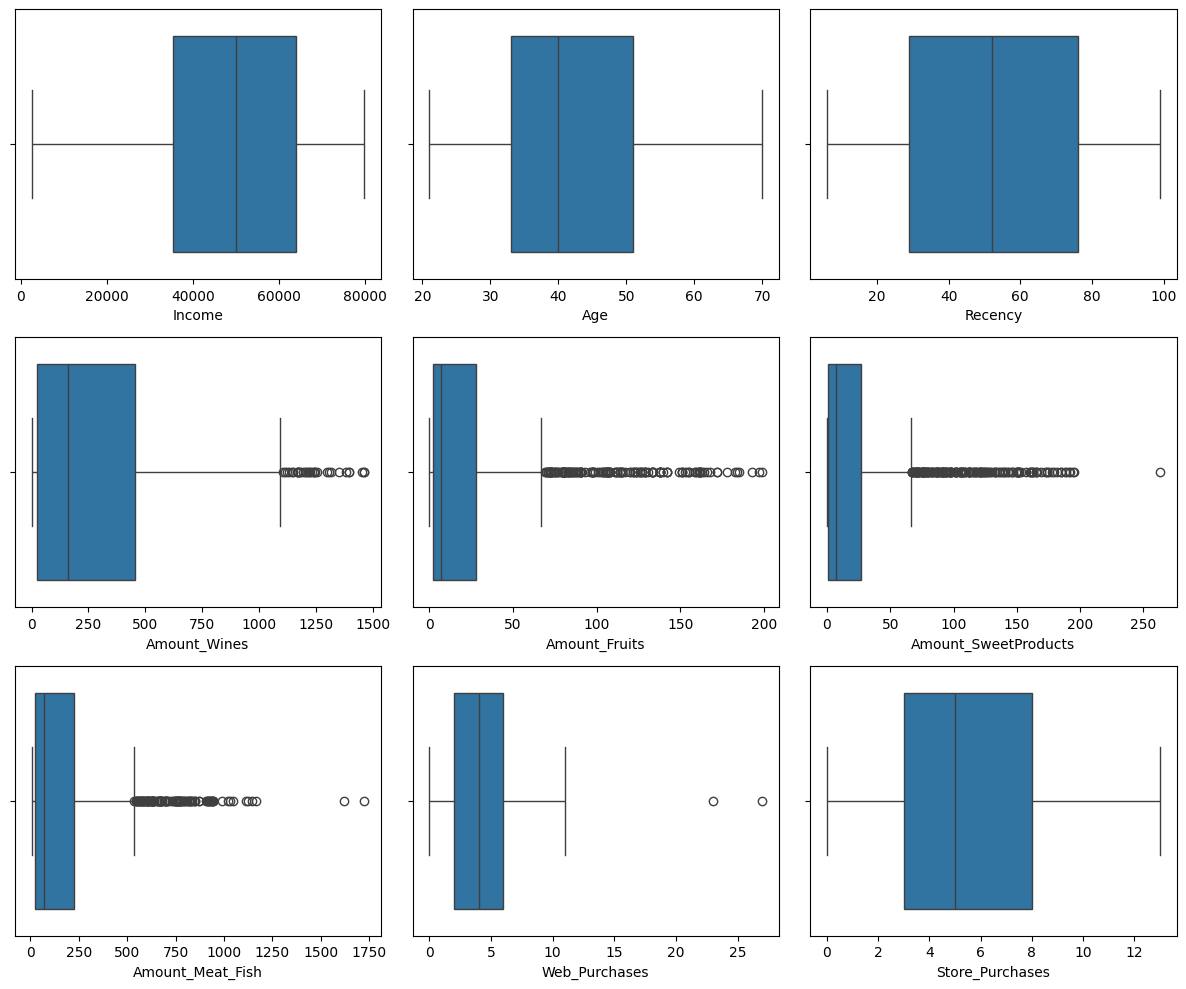

In [ ]:
# plot barplot to review the outliers.

plt.figure(figsize=(12,10))

for i, feature in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(data=df, x=feature)

plt.tight_layout()
plt.show()

* The amount spent by customers is way more than the average spent, indicating some outliers.

## Bivariate Analysis ##

<Axes: >

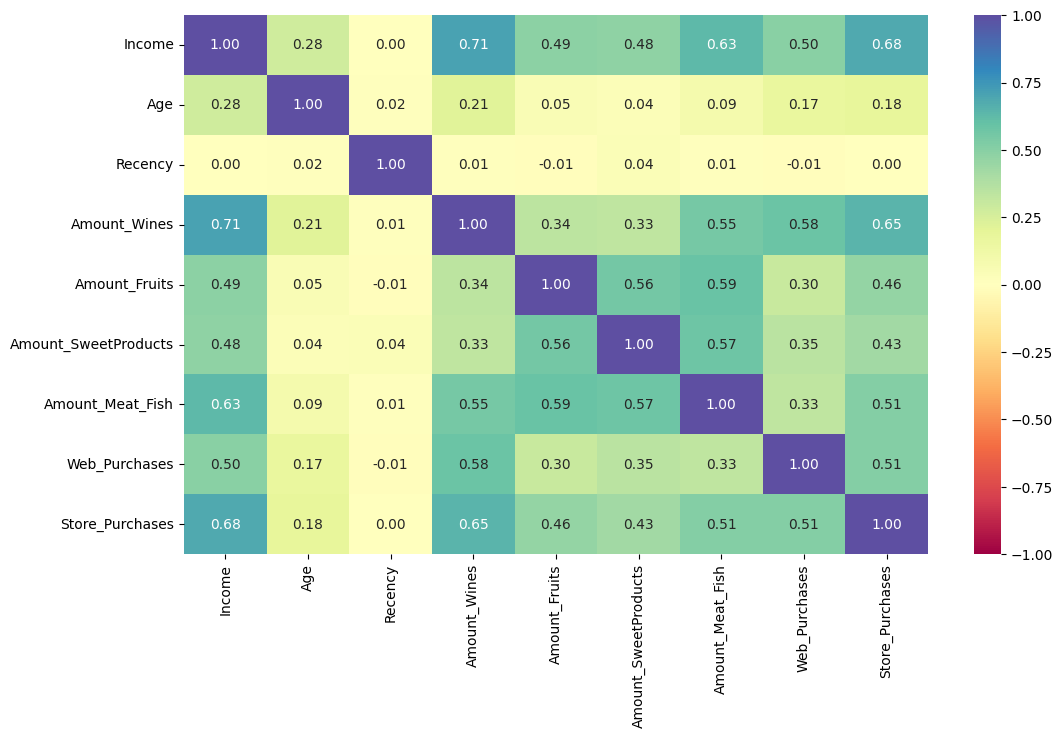

In [ ]:
# defining the size of the plot
plt.figure(figsize=(12, 7))
sns.heatmap(data=df.corr(), vmin=-1, vmax=+1, annot=True, fmt=".2f", cmap="Spectral")

- The amount spent on wine has a high positive correlation with the income of the customer.
- The correlation between income and web purhcases is lower than the correlation between income and store purhcases, indicating that customers with higher incomes tend to make more purchases from the store than online.

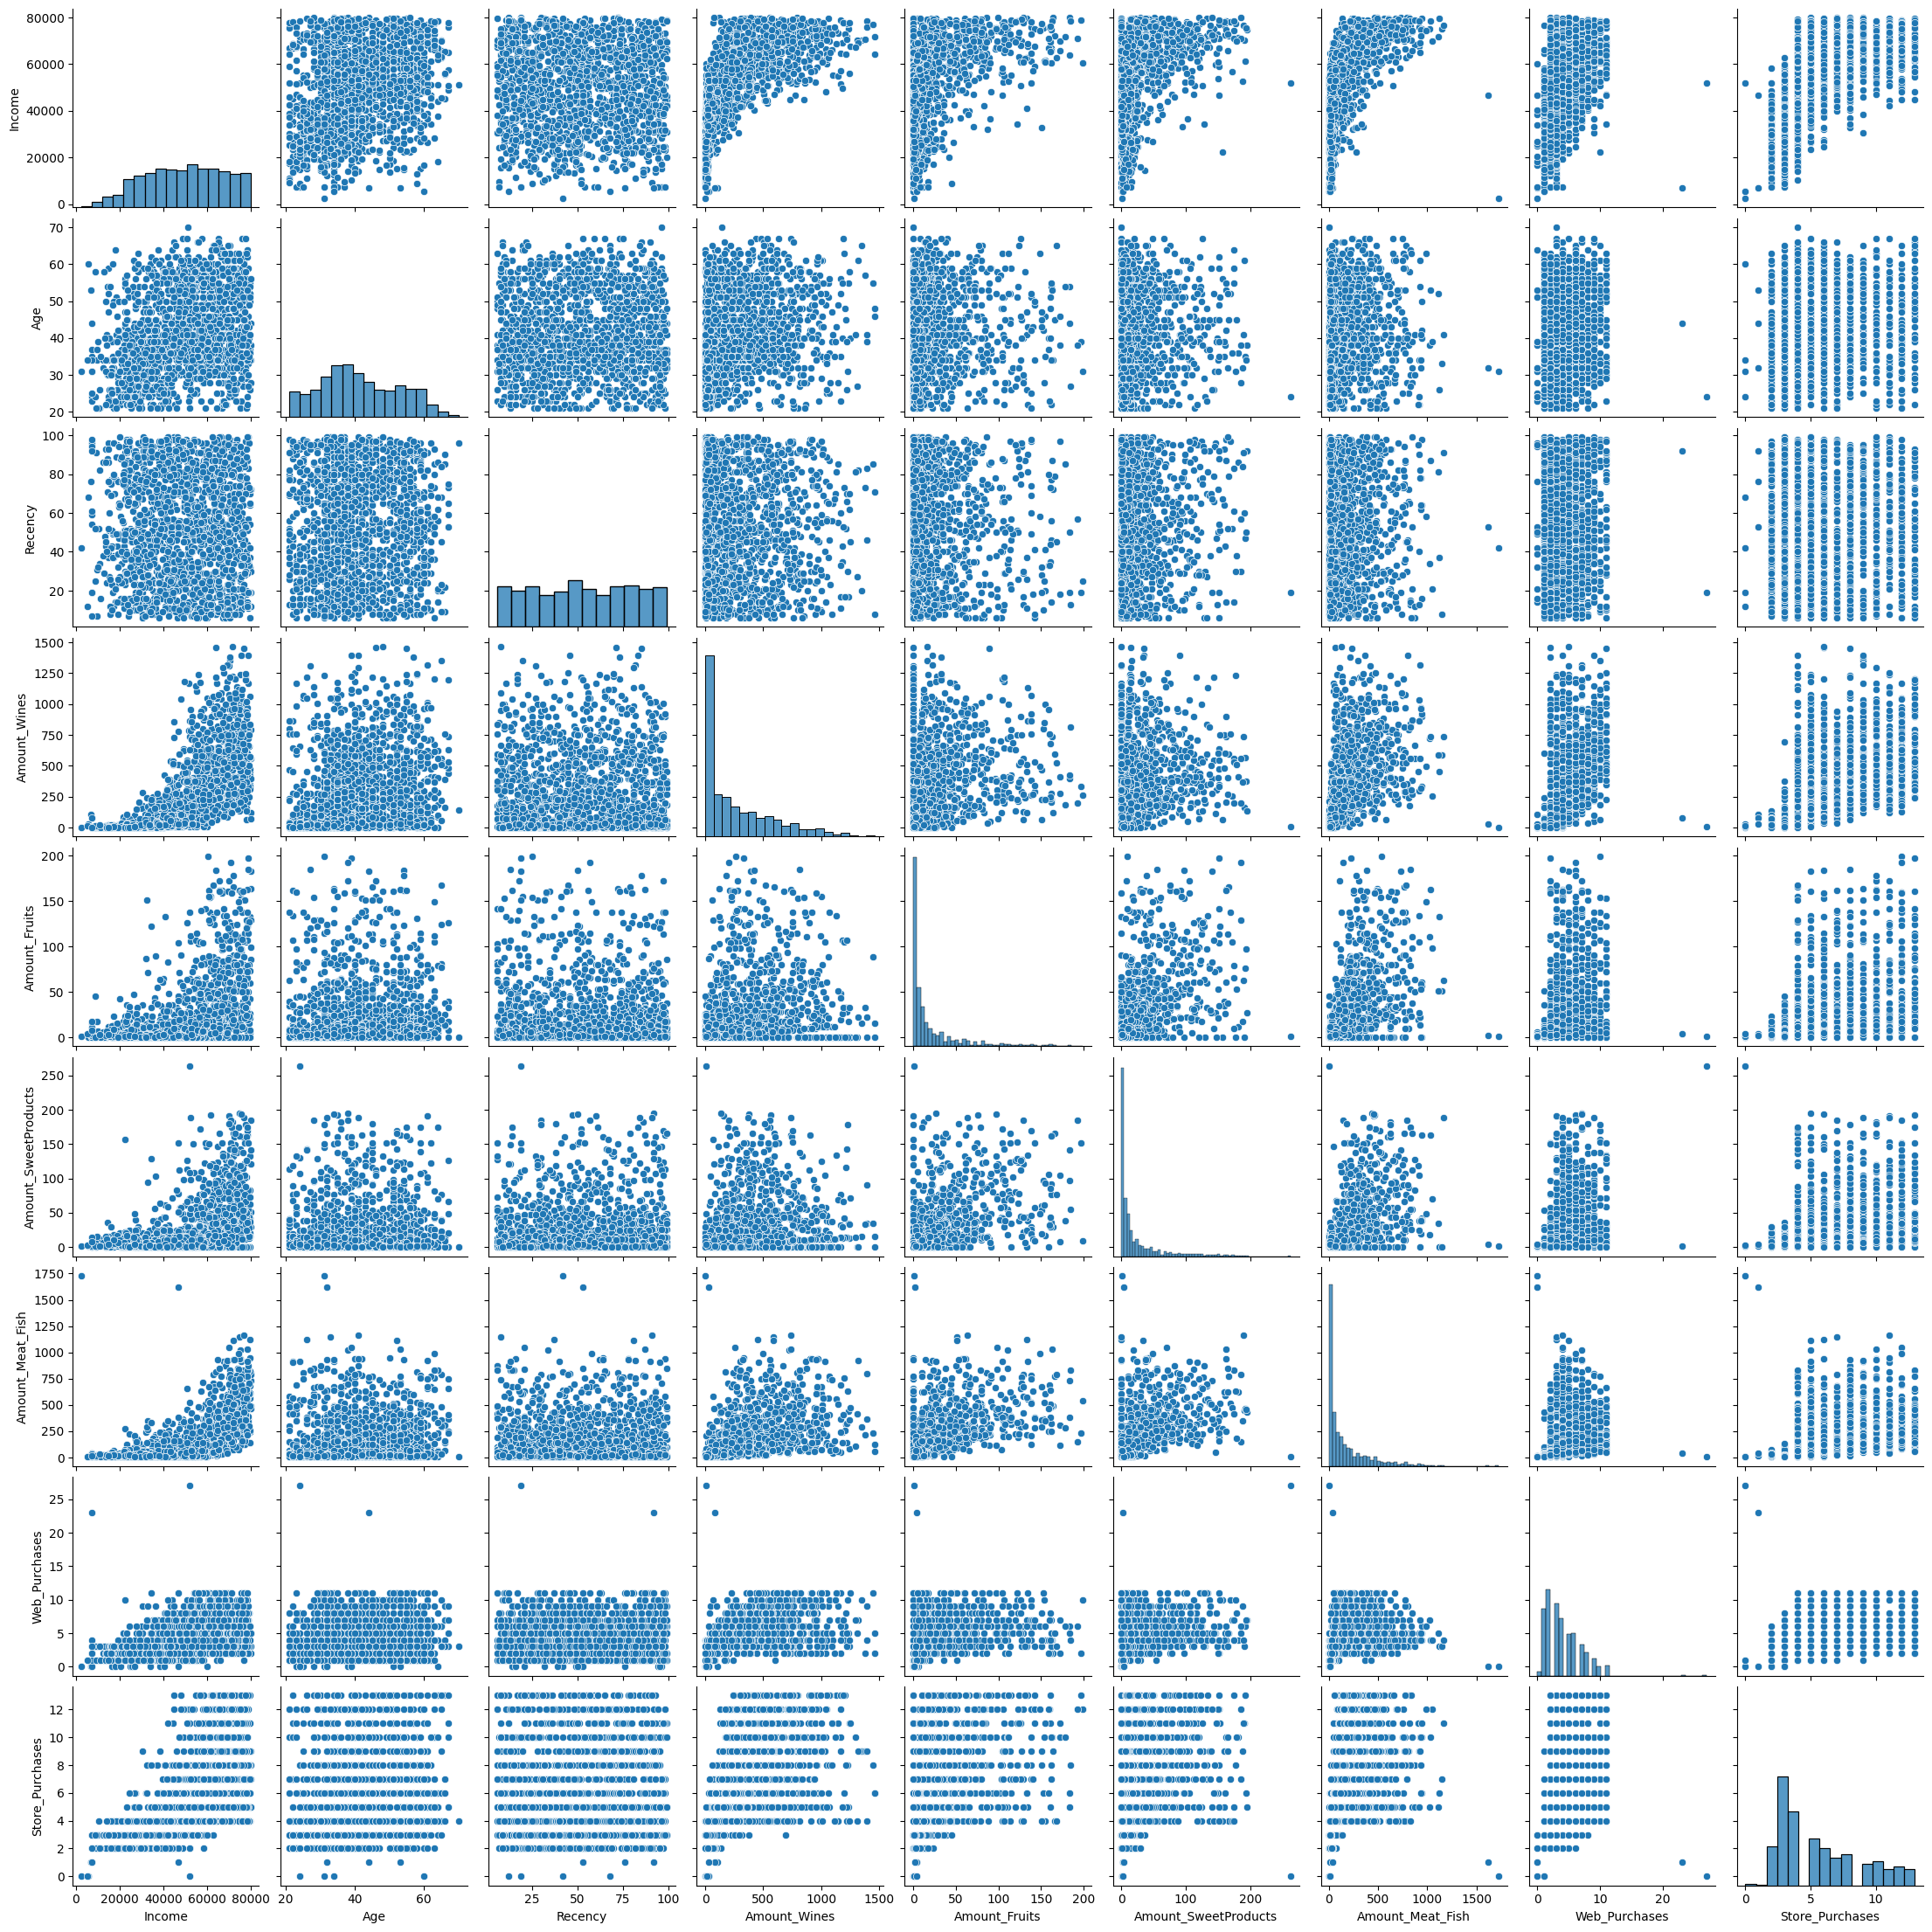

In [ ]:
sns.pairplot(data=df)

# Data Preprocessing #

## Data Scaling ##

* Clustering algorithms are based on measuring the similarity between data points in terms of a distance matrix. To ensure the uniform weightage of all features, its required to scale the data.
* We use sklearn's preprocesses `StandardScaler` to scale the data. It applies Z-scale scaling method to unify the data.

In [ ]:
# Instantiate the Standard Scaler
standard_scaler = StandardScaler()

# Fit the numerical data using StandardScaler and create a new dataframe
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df))

#Display top 5 rows
scaled_df.head()


0         1         2         3         4         5         6  \
0  0.506072  1.028894  0.195877  1.144281  1.816153  1.735231  2.557636   
1 -0.149978  1.299581 -0.543542 -0.857380 -0.615189 -0.600854 -0.734966   
2  1.255628  0.307061 -0.987194  0.473853  0.726241 -0.063823  0.331651   
3 -1.245692 -1.407292 -0.987194 -0.857380 -0.531350 -0.547151 -0.632942   
4  0.514694 -1.136605  1.526832 -0.337718  0.558562  0.097286 -0.011521   

          7         8  
0  1.405425 -0.543864  
1 -1.156131 -1.181126  
2  1.405425  1.367924  
3 -0.790194 -0.543864  
4  0.307615  0.093399

In [ ]:
# Describe the scaled data

scaled_df.describe().T

count          mean       std       min       25%       50%       75%  \
0  1600.0  1.598721e-16  1.000313 -2.591778 -0.760330  0.053835  0.833985   
1  1600.0  2.597922e-16  1.000313 -1.858438 -0.775688 -0.144085  0.848436   
2  1600.0 -3.996803e-17  1.000313 -1.726613 -0.876281 -0.025949  0.861354   
3  1600.0  4.440892e-17  1.000313 -0.892666 -0.815679 -0.376212  0.558057   
4  1600.0  2.220446e-17  1.000313 -0.643135 -0.587243 -0.447510  0.139366   
5  1600.0  4.773959e-17  1.000313 -0.627705 -0.600854 -0.439744  0.097286   
6  1600.0 -2.220446e-18  1.000313 -0.744241 -0.670042 -0.442806  0.281799   
7  1600.0  4.662937e-17  1.000313 -1.522068 -0.790194 -0.058321  0.673552   
8  1600.0 -4.440892e-17  1.000313 -1.818389 -0.862495 -0.225233  0.730661   

        max  
0  1.719157  
1  2.562789  
2  1.711686  
3  3.797122  
4  4.918211  
5  6.434250  
6  7.232203  
7  8.358221  
8  2.323818

* All the features have a mean of ~0 and standard deviation ~1 after the scaling.

# Dimensonality Reduction and Visulaziation using t-SNE

* t-SNE = t-distributed Stochastic Neighbor Embedding technique

In [ ]:
# Initiate the t-SNE object

# n_components = no. of target dimensions.
# n_jobs = -2 specifies all but for one core processor for parallel computation, which speeds up the process.
tsne = TSNE(n_components=2, n_jobs=-2, random_state=RS)

# Perform the dimensonality reduction on the scaled data.
tsne_reduced_data = tsne.fit_transform(scaled_df)

# Create a daaframe from the reduced data.
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature1", "Feature2"]))

In [ ]:
tsne_2d_data.head()

Feature1   Feature2
0  49.779507  -4.341959
1 -13.018125  -3.316316
2  28.172621 -10.222345
3 -45.435825 -22.603098
4   9.555074  17.562840

<Axes: xlabel='Feature1', ylabel='Feature2'>

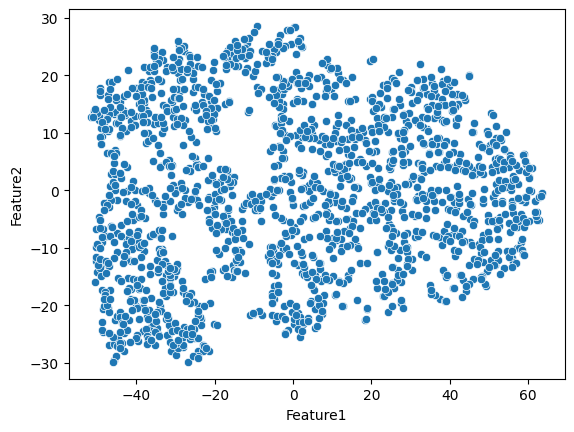

In [ ]:
# Plot a scatter plot to visualize the data
sns.scatterplot(data=tsne_2d_data, x="Feature1", y="Feature2")

* We can see roughly 3 to 4 clusters

* How do we know if the dimensonality reduction is good?
* One way is to perform different reductions, plot them and review.
* Perplexity is a parameter that defines the no. of observations are considered for determining the neibhor.

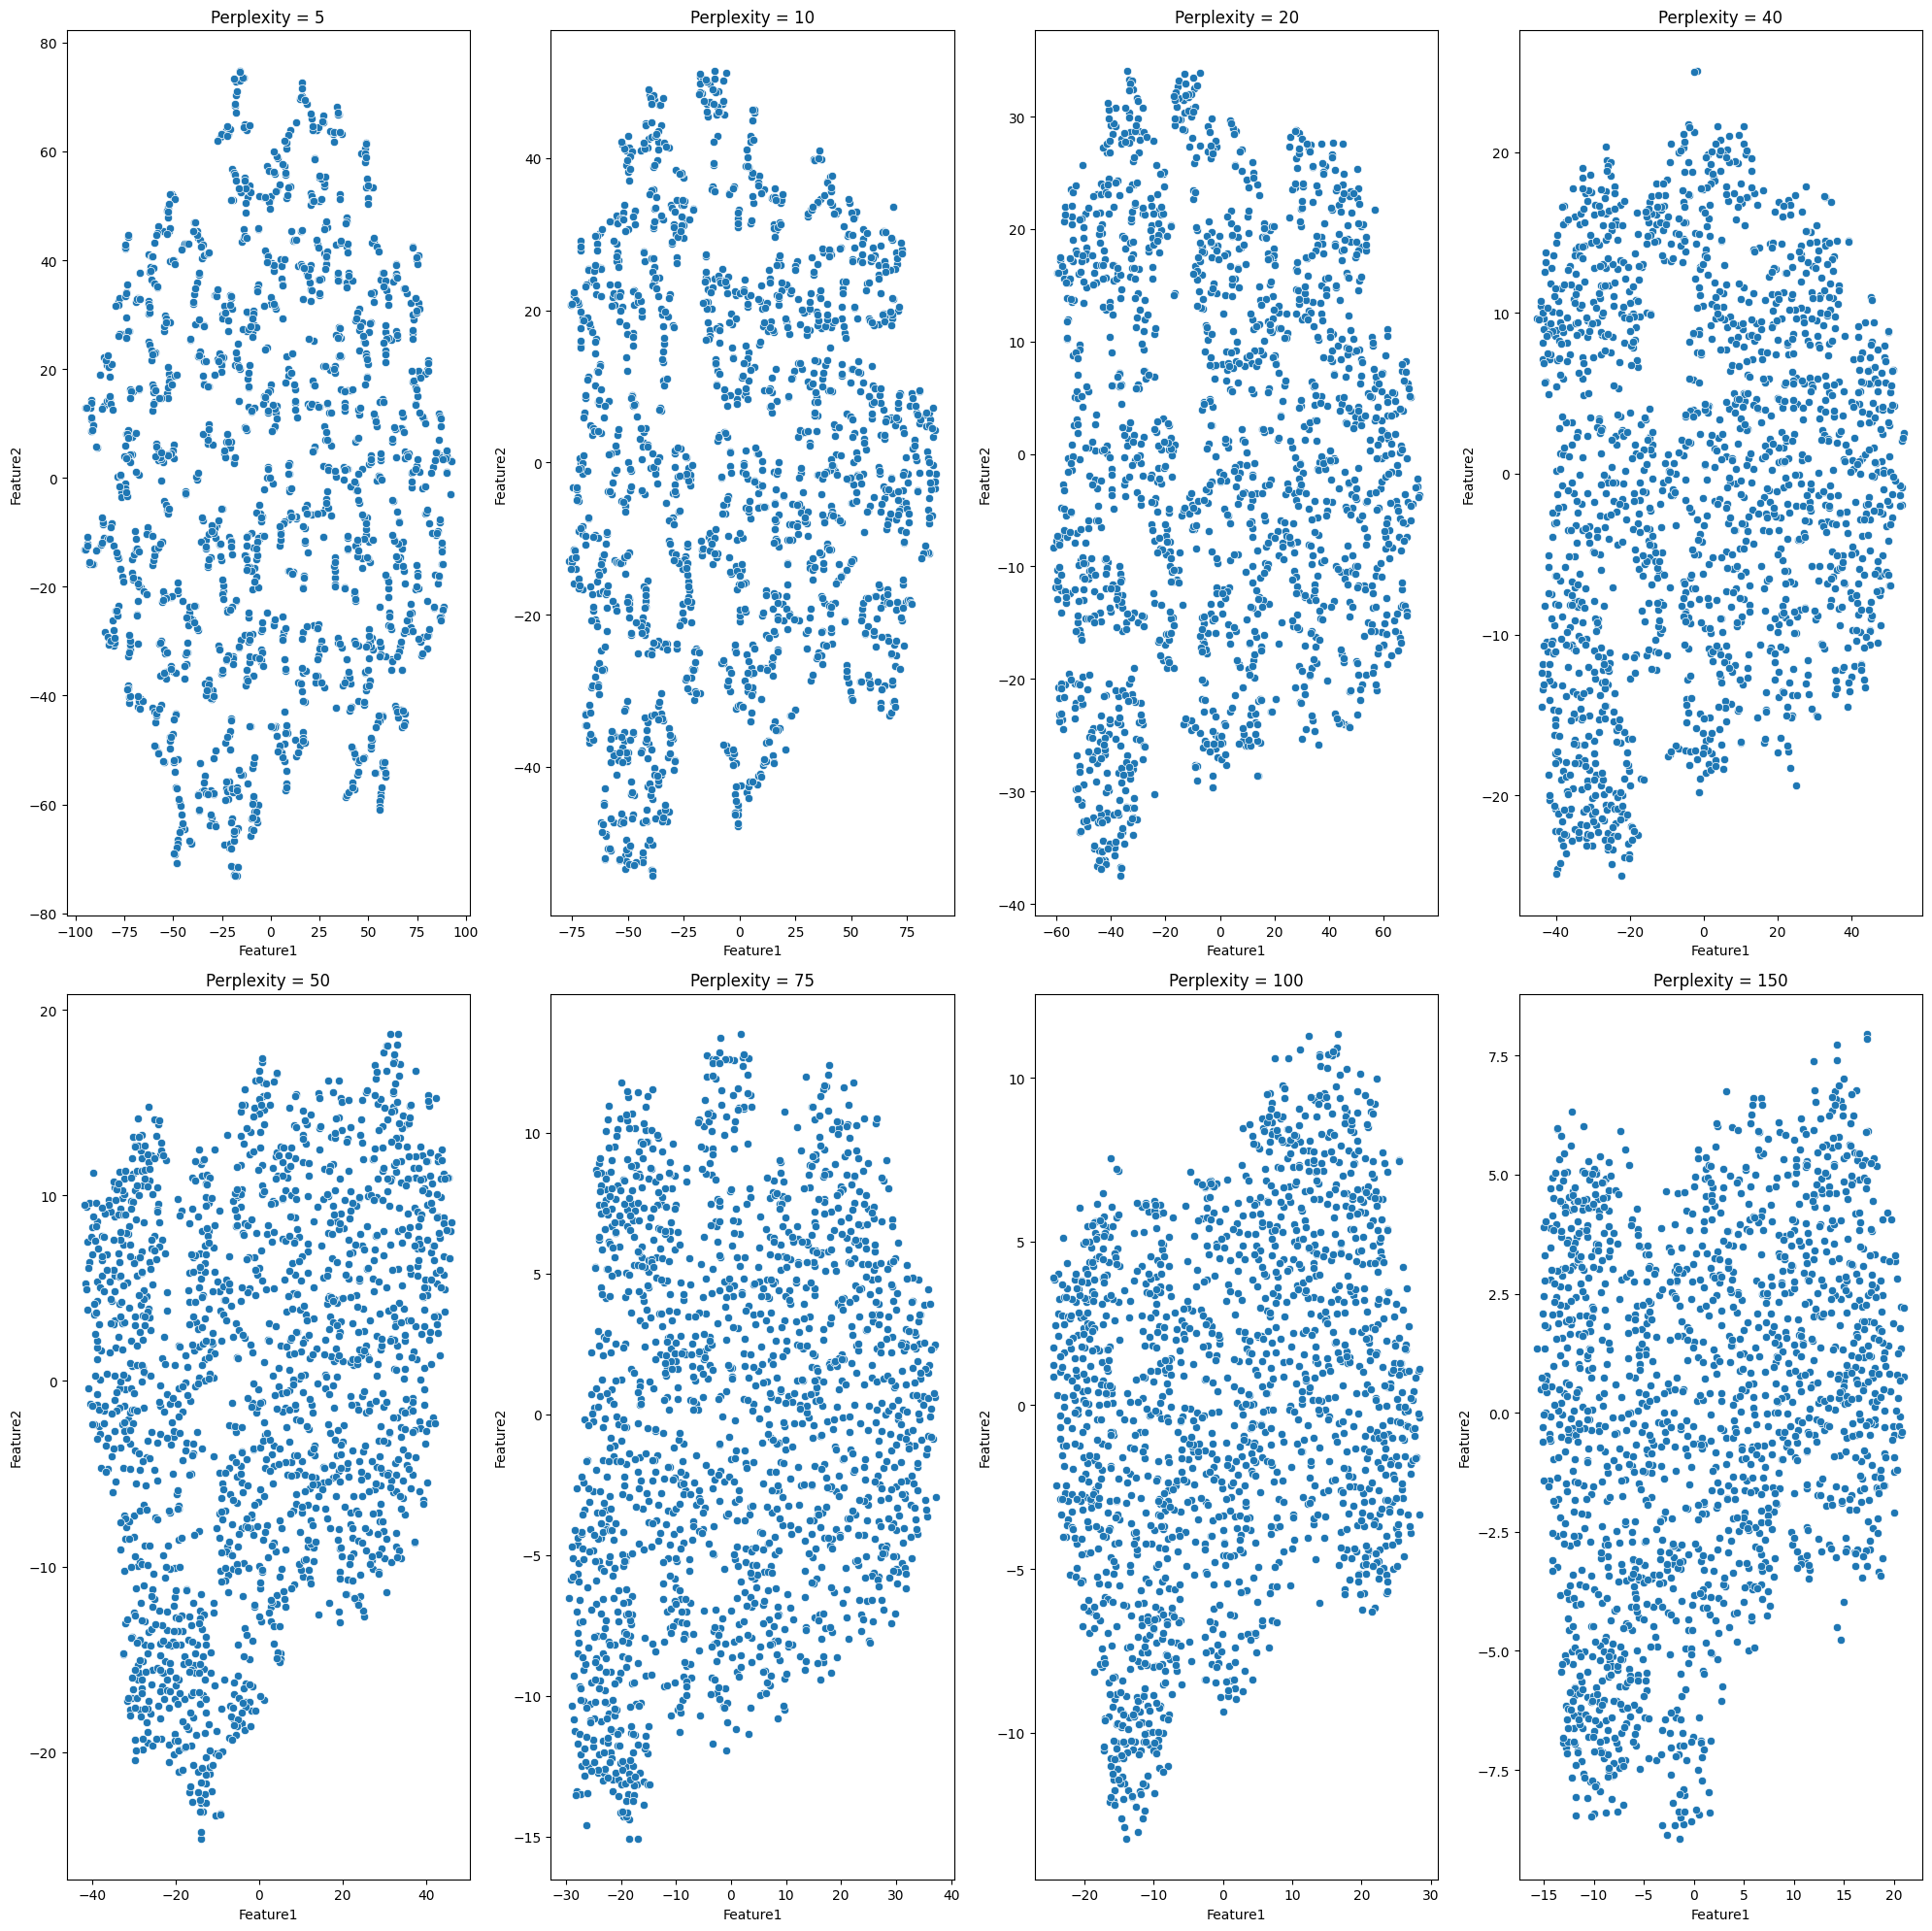

In [ ]:
# define a set of perplexity values to iterate through and perform dimensonality reduction
perplexity = [5,10,20,40,50,75,100,150]

plt.figure(figsize=(20,20))
# for each perplexity value, perform the dimensionality reduction and visulize the data.
for i in range(len(perplexity)):
  tsne_perplexity = TSNE(n_components=2, n_jobs=-2, perplexity=perplexity[i], random_state=RS)

  # Fit and transform the scaled_data
  X_red = pd.DataFrame(tsne_perplexity.fit_transform(scaled_df), columns=(['Feature1', 'Feature2']))

  # Plot the reduced data to visualize the reduced data.
  plt.subplot(2,4,i+1)
  plt.title("Perplexity = " + str(perplexity[i]))
  sns.scatterplot(data=X_red, x='Feature1', y='Feature2')

plt.tight_layout()
plt.show()


* At perplexity=50, the white space (sparcity) is bit more clear indicating that could be a best value

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

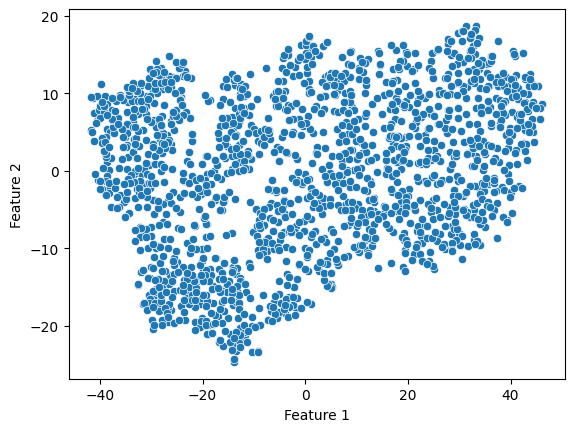

In [ ]:
# Perform dimensionality reduction using Perplexity value 50 for solving the problem.

tsne = TSNE(n_components=2, n_jobs=-2, perplexity=50, random_state=50)
tsne_reduced_data = tsne.fit_transform(scaled_df)

reduced_2D_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1", "Feature 2"]))

# plot the reduced data for visulaizationn.
sns.scatterplot(data=reduced_2D_data, x="Feature 1", y="Feature 2")




## Reduction to 3 dimensions ##

In [ ]:
# Instantiate the t-SNE object
tsne = TSNE(n_components=3, n_jobs=-2, perplexity=50, random_state=RS)

# Fit and transform the data to reduce the dimensionality
tsne_reduced_3d_data = tsne.fit_transform(scaled_df)

# Create panda data frame on the reduced data
reduced_3D_data = pd.DataFrame(tsne_reduced_3d_data, columns=(["Feature 1", "Feature 2", "Feature 3"]))
reduced_3D_data.head()

Feature 1  Feature 2  Feature 3
0  12.285045  -0.650983   1.319623
1  -1.729638  -5.527844   1.288417
2   6.828343  -0.581539  -2.995000
3 -10.348543  -2.282876  -3.741693
4   1.165053   1.540315   5.172536

In [ ]:
# Plot the 3D scatter plot to visulaize the data

fig = px.scatter_3d(data_frame=reduced_3D_data, x="Feature 1", y="Feature 2", z="Feature 3")
fig.show()

#**K-Means Clustering**

In [ ]:
# K-Means clustering algorithm requires a set of clusters to begin with.
n_clusters = 4

# Instantiate the K-Means model.
kmeans_4 = KMeans(n_clusters=n_clusters, random_state=RS)

# Fit the data
kmeans_4.fit(scaled_df)


KMeans(n_clusters=4, random_state=0)

In [ ]:
# Calculate the WCSS (With-in the Cluster Sum of squares)
wcss_4 = kmeans_4.inertia_
print("WCSS for k={} is {}".format(n_clusters, wcss_4))

# Calculate the shiloute score
silhoutte_score = silhouette_score(scaled_df, kmeans_4.labels_)
print("Shiloute score for k = {} is {}".format(n_clusters, silhoutte_score))



WCSS for k=4 is 7321.639055442224
Shiloute score for k = 4 is 0.1776121193279328


In [ ]:
# Assign the cluster labels to tsne_2d_data
tsne_2d_data["Clusters"] = kmeans_4.labels_
tsne_2d_data.head()

Feature1   Feature2  Clusters
0  49.779507  -4.341959         2
1 -13.018125  -3.316316         0
2  28.172621 -10.222345         1
3 -45.435825 -22.603098         3
4   9.555074  17.562840         1

<Axes: xlabel='Feature1', ylabel='Feature2'>

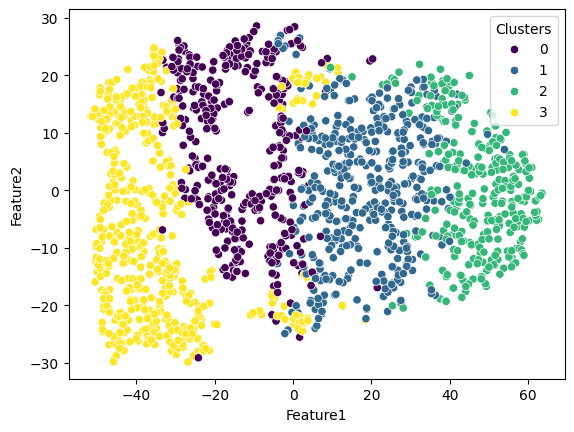

In [ ]:
# Plot the data to visualize the clusters.

sns.scatterplot(data=tsne_2d_data, x="Feature1", y="Feature2", hue="Clusters", palette="viridis")

In [ ]:
# Assign the clusters to 3 dimensional data

reduced_3D_data['Clusters'] = kmeans_4.labels_

fig = px.scatter_3d(data_frame=reduced_3D_data, x="Feature 1", y="Feature 2", z="Feature 3", color="Clusters")
fig.show()

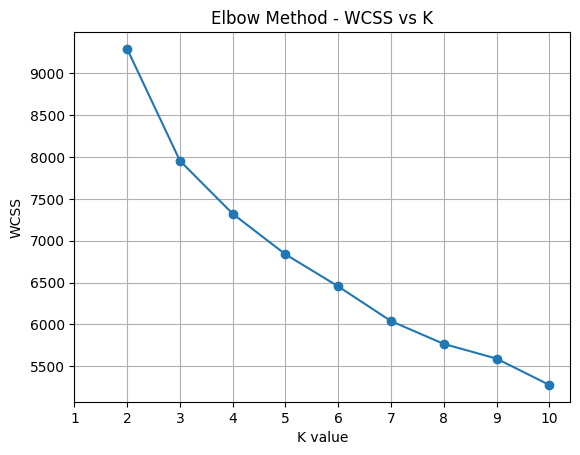

In [ ]:
# We need to find an optimum value for K.

wcss_list = []
sil_score_list = []

# Check the wcss values for K value in the range 2,10.
for i in range(2,11):
  clusterer = KMeans(n_clusters=i, random_state=RS)
  clusterer.fit(scaled_df)

  # WCSS values
  wcss_list.append(clusterer.inertia_)

  score = silhouette_score(scaled_df, clusterer.labels_)
  #Silhoutte score
  sil_score_list.append(score)

# Plot the WCSS against the K values.
plt.plot(range(2,11), wcss_list, marker='o')
plt.title("Elbow Method - WCSS vs K")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.grid(True)

plt.show()

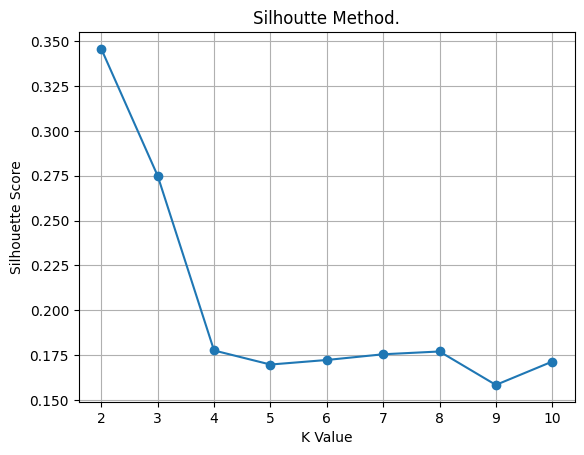

In [ ]:
# Plot the Silhouette score vs K.

plt.plot(range(2,11), sil_score_list, marker='o')
plt.title("Silhoutte Method.")
plt.xlabel("K Value")
plt.ylabel("Silhouette Score")
plt.xticks(range(2,11))
plt.grid(True)
plt.show()

* Silhouette score is 0.175 for K=4 is too low.
* For K=3, Silhouette score is 0.275 which seems to be a reasonable one.
* At K=3, the WCSS falls sharply and starts to taper down, indicating possibly 3 or 4 clusters are optimum. But based on Shilouette score, it seems K=3 is fair value.

In [ ]:
# Perform the K-Means clustering with K=3
n_clusters=3

# Instantiate the K-Means model object.
kmeans_3 = KMeans(n_clusters=n_clusters, random_state=RS)

# Fit the training data
kmeans_3.fit(scaled_df)

#print the wcss value and silhoutte scores.
print("WCSS for k={} is {}".format(n_clusters, kmeans_3.inertia_))
print("Silhoutte score for k={} is {}".format(n_clusters, silhouette_score(scaled_df, kmeans_3.labels_)))


WCSS for k=3 is 7954.195145787651
Silhoutte score for k=3 is 0.27490613274545406


In [ ]:
# Assign the clusters to the 2D data
reduced_2D_data["Clusters"] = kmeans_3.labels_

reduced_2D_data.head()

Feature 1  Feature 2  Clusters
0  39.498524   2.940528         2
1 -10.644193   5.894240         0
2  19.617210   9.040364         1
3 -38.666183   5.346339         0
4  -4.329536  -4.579242         1

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

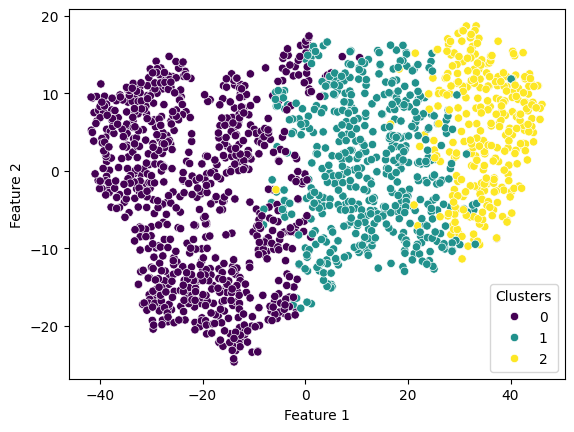

In [ ]:
# Plot the data in 2D to visualize the clusters

sns.scatterplot(data=reduced_2D_data, x="Feature 1", y="Feature 2", hue="Clusters", palette="viridis")

In [ ]:
# Plot the 3D data and see how it looks.
reduced_3D_data["Clusters"] = kmeans_3.labels_

fig = px.scatter_3d(data_frame=reduced_3D_data, x="Feature 1", y="Feature 2", z="Feature 3", color="Clusters")
fig.show()

# **Cluster profiling**

In [ ]:
# Assign the clusters to our data
df['Clusters'] = kmeans_4.labels_

df.head()

Income  Age  Recency  Amount_Wines  Amount_Fruits  Amount_SweetProducts  \
0  58138.0   53       58           635             88                    88   
1  46344.0   56       38            11              1                     1   
2  71613.0   45       26           426             49                    21   
3  26646.0   26       26            11              4                     3   
4  58293.0   29       94           173             43                    27   

   Amount_Meat_Fish  Web_Purchases  Store_Purchases  Clusters  
0               718              8                4         2  
1                 8              1                2         0  
2               238              8               10         1  
3                30              2                4         3  
4               164              5                6         1

Clusters
3    31.5000
1    27.2500
0    23.0625
2    18.1875
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of Clusters')

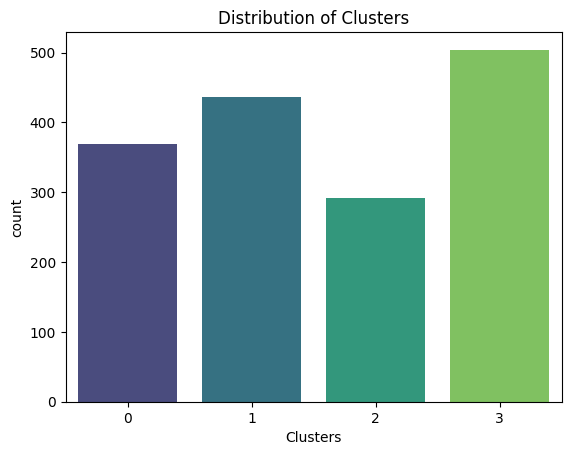

In [ ]:
# Review the density of each cluster.
print(100*df['Clusters'].value_counts(normalize=True))

# plot a count plot
sns.countplot(data=df, x="Clusters", palette="viridis")
plt.title("Distribution of Clusters")

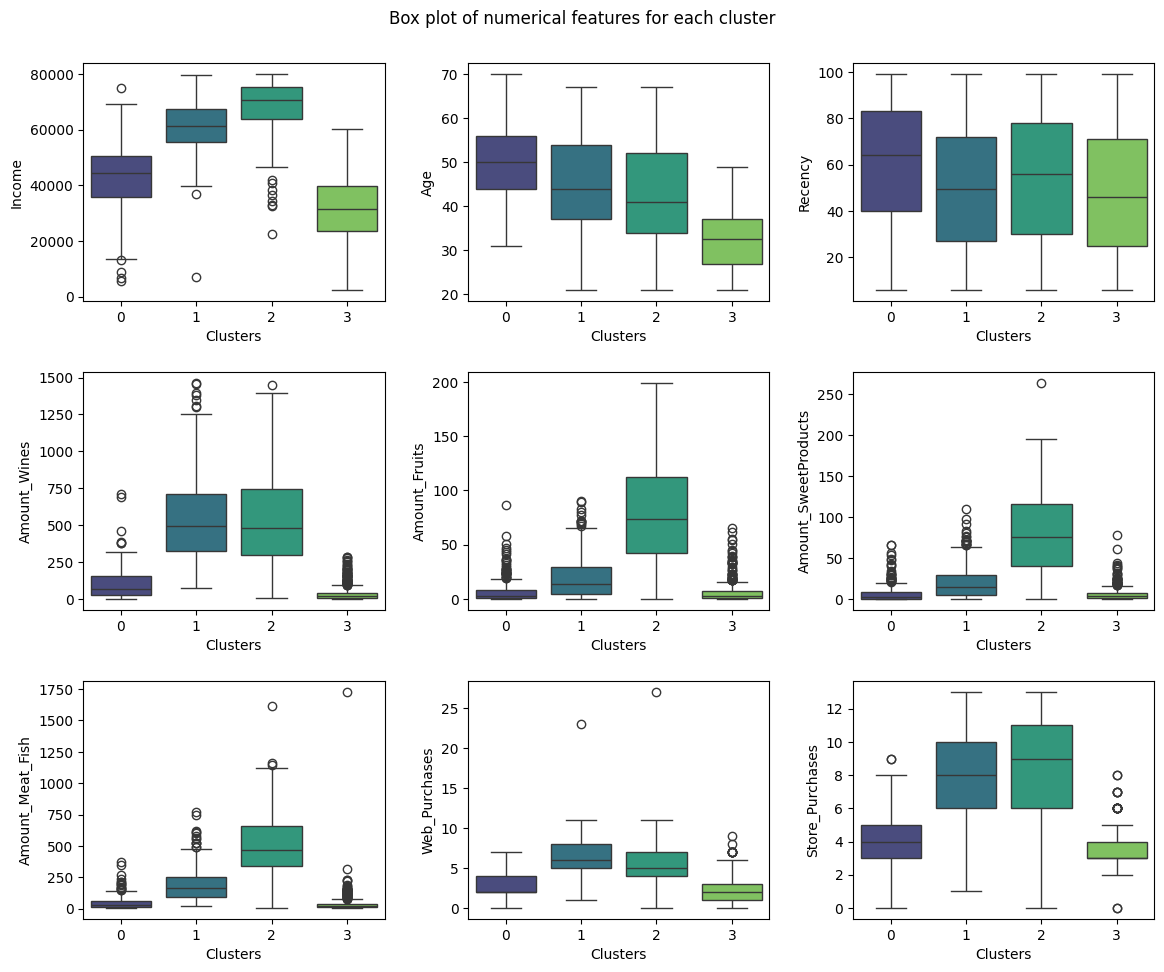

In [ ]:
# To review the feartures, generate the box plot for numeric features.
plt.figure(figsize=(12,10))
plt.suptitle("Box plot of numerical features for each cluster")

for i, feature in enumerate(df.select_dtypes(include="number").columns.to_list()[:-1]):
  plt.subplot(3,3,i+1)
  sns.boxplot(data=df, y=feature, x='Clusters', palette="viridis")

plt.tight_layout(pad=2)
plt.show()

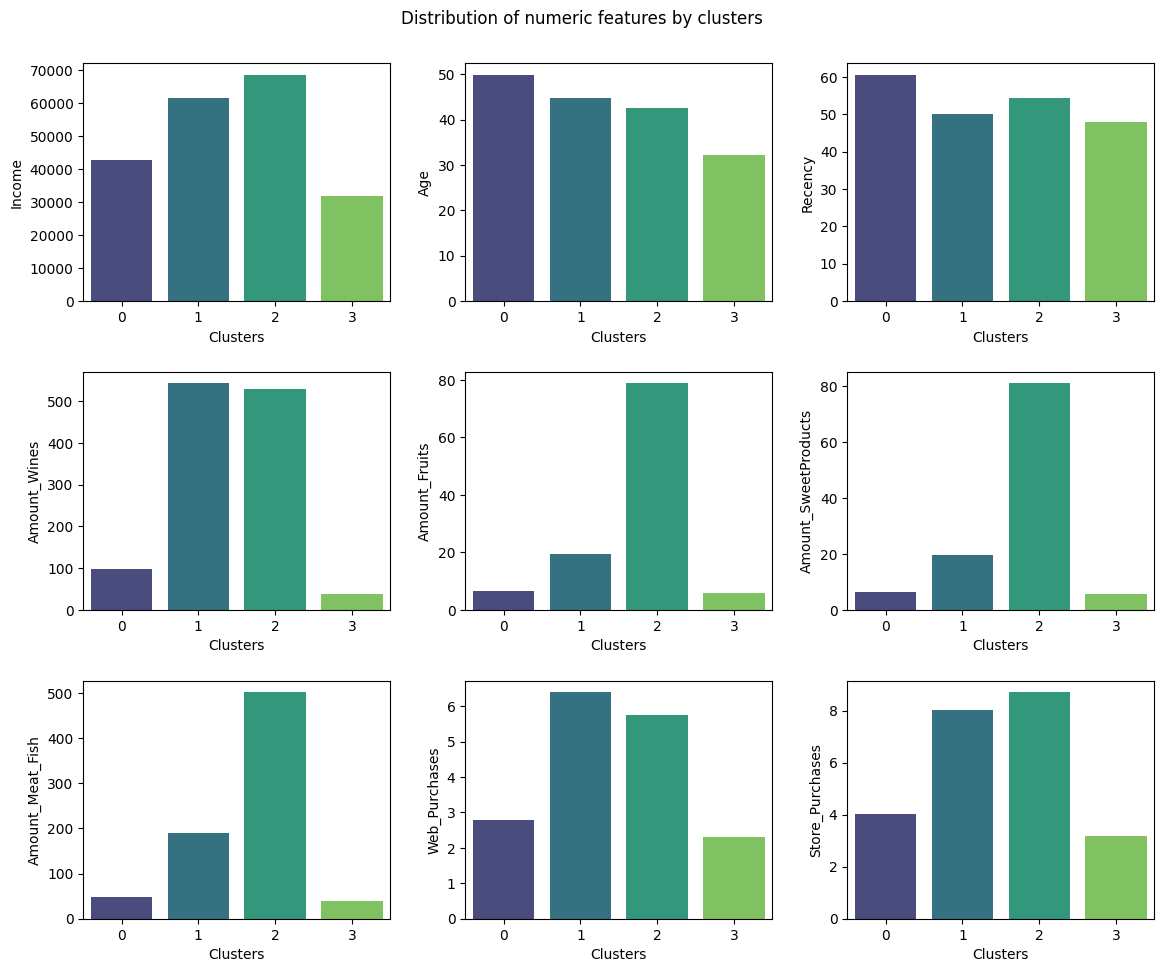

In [ ]:
# Plot the data in barplot for review.

plt.figure(figsize=(12,10))
plt.suptitle("Distribution of numeric features by clusters")

for i, feature in enumerate(df.select_dtypes(include="number").columns.to_list()[:-1]):
  plt.subplot(3,3,i+1)
  sns.barplot(data=df, x="Clusters", y=feature, palette="viridis", errorbar=None)

plt.tight_layout(pad=2)
plt.show()

